In [1]:
# ANALYSIS FOR BRAZIL

In [2]:
# Install and import the appropriate libraries and dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Objective
The goal is to investigate whether or not there is a "home field advantage" for a nation that hosts the Olympic games. This analysis will study the
Brazilian olympic team, and try to determine if there was an unusually high improvement in performance during the 2016 Summer Olympic Games in 
Rio de Janeiro.

Metrics to Produce
We will look at the following metrics in order to check for a host advantage, considering medal count as the measure for success in an Olympic Games:

Medal count trends:
Did the total medal count increase during the hosted olympics?
How many standard deviations (z-score) from the average medal count across all olympic games was the medal count for the hosted games?
Where did the host country place on the total medal rankings in their hosted games vs. other games?
How did the host country's performance metrics compare to the rest of the world's metrics? Does that tell us anything?

SyntaxError: invalid syntax (3465457635.py, line 2)

In [5]:
# Read the csv into a dataframe
df = pd.read_csv('resources/athlete_events.csv')

In [6]:
# We want to make sure that there are no duplicate event medals, for example,
# if NOC == ARG won a gold medal in Men's Football in 2004, we want to make sure
# that only 1 gold medal is counted (instead of 1 for every player on the team),
# so we will drop duplicates based on the columns 'Year', 'Event', 'Medal', 'NOC'

#no_duplicates_df = df.drop_duplicates(subset=['Year', 'Event', 'Medal', 'NOC'])

In [7]:
# Use only the Summer Olympics for Analysis
summer_df = df[df['Season'] == 'Summer']

In [14]:
# create a dataframe for only the Brazil team, where "Brazil" is anywhere in the team name
brazil_df = summer_df[summer_df['Team'].str.contains('Brazil')]

# print the unique values of Team column to see if they are all "brazil"
print(brazil_df['Team'].unique())
print(brazil_df['NOC'].unique())

# Clean up the Team column to have only "brazil" instead of "brazil-1", "brazil-2", etc.
brazil_df.loc[:, 'Team'] = 'Brazil'
print(brazil_df['Team'].unique())

# It looks like NOC is a more accurate way to describe the country's team,
# and doesn't pose as many issues as the Team column does (e.g. "brazil-1", "brazil-2", etc.)
# Let's use NOC instead of Team for the rest of the analysis.
brazil_df = summer_df[summer_df['NOC'] == 'BRA']

['Brazil' 'Brazil-1' 'Brazil-2']
['BRA']
['Brazil']


In [19]:
# Create a dataframe where NOC is not BRA
rest_of_world_df = summer_df[summer_df['NOC'] != 'BRA']

# Clean up the team names to have only the country name
# If "-" appears in the team name, use only the part of the string that comes before "-"
rest_of_world_df.loc[:, 'Team'] = rest_of_world_df['Team'].str.split('-').str[0]

In [20]:
Let's establish an organized dataframe for the rest of the world's data. We can use this later to create summary statistics for all countries 
across all games, for some countries across some games, etc. We'll come back to this dataframe after we calculate all of the stats for the 
Brazil team.

SyntaxError: unterminated string literal (detected at line 2) (2054979324.py, line 2)

In [44]:
# create a dataframe that is the rest_of_world_df (referred to now as rw) grouped by Games, then NOC
# We can use this to calculate medal counts for each country in each Games
games_df_rw = rest_of_world_df.groupby(['Games', 'NOC']).agg({'Medal': 'count'}).reset_index()

# Add columns for gold_medals, silver_medals, bronze_medals and total_medals
# This will be, for each NOC, the sum of the medals won in each category for each games
games_df_rw['gold_medals'] = rest_of_world_df[rest_of_world_df['Medal'] == 'Gold'].groupby(['Games', 'NOC']).agg({'Medal': 'count'}).reset_index()['Medal']
games_df_rw['silver_medals'] = rest_of_world_df[rest_of_world_df['Medal'] == 'Silver'].groupby(['Games', 'NOC']).agg({'Medal': 'count'}).reset_index()['Medal']
games_df_rw['bronze_medals'] = rest_of_world_df[rest_of_world_df['Medal'] == 'Bronze'].groupby(['Games', 'NOC']).agg({'Medal': 'count'}).reset_index()['Medal']

# Create a clean column for total medals
games_df_rw['total_medals'] = games_df_rw['gold_medals'] + games_df_rw['silver_medals'] + games_df_rw['bronze_medals']

# Fill NaN values with 0
games_df_rw = games_df_rw.fillna(0)

# Format values in all columns except Games to integers
games_df_rw = games_df_rw.astype({'Medal': 'int', 'gold_medals': 'int', 'silver_medals': 'int', 'bronze_medals': 'int'})

games_df_rw

,Games,NOC,Medal,gold_medals,silver_medals,bronze_medals,total_medals
0,1896 Summer,AUS,3,2,1,1,4.0
1,1896 Summer,AUT,5,2,2,2,6.0
2,1896 Summer,DEN,6,1,4,3,8.0
3,1896 Summer,FRA,11,5,3,2,10.0
4,1896 Summer,GBR,9,3,5,3,11.0
...,...,...,...,...,...,...,...
2782,2016 Summer,VIE,2,0,0,0,0.0
2783,2016 Summer,VIN,0,0,0,0,0.0
2784,2016 Summer,YEM,0,0,0,0,0.0
2785,2016 Summer,ZAM,0,0,0,0,0.0


In [22]:
# create a dataframe for the Brazil team in the Summer Olympics grouped by Games.
games_df_brazil = brazil_df.groupby('Games').agg({'Medal': 'count'})

# Add columns for gold_medals, silver_medals, bronze_medals and total_medals
games_df_brazil['gold_medals'] = brazil_df[brazil_df['Medal'] == 'Gold'].groupby('Games').agg({'Medal': ['count']})
games_df_brazil['silver_medals'] = brazil_df[brazil_df['Medal'] == 'Silver'].groupby('Games').agg({'Medal': ['count']})
games_df_brazil['bronze_medals'] = brazil_df[brazil_df['Medal'] == 'Bronze'].groupby('Games').agg({'Medal': ['count']})

# fill NaN values with 0
games_df_brazil = games_df_brazil.fillna(0)

# format values in all columns except Games to integers
games_df_brazil = games_df_brazil.astype(int)

games_df_brazil

,Medal,gold_medals,silver_medals,bronze_medals
Games,,,,
1900 Summer,0,0,0,0
1920 Summer,3,1,1,1
1924 Summer,0,0,0,0
1932 Summer,0,0,0,0
1936 Summer,0,0,0,0
1948 Summer,1,0,0,1
1952 Summer,3,1,0,2
1956 Summer,1,1,0,0
1960 Summer,2,0,0,2


In [23]:
# Create a cleaner "total_medals" column
games_df_brazil['total_medals'] = games_df_brazil[['gold_medals', 'silver_medals', 'bronze_medals']].sum(axis=1)

# Add a column for non-medal participations, which is the count of all rows for Games where Medal is NaN
games_df_brazil['non_medal_participations'] = brazil_df[brazil_df['Medal'].isnull()].groupby('Games').size()

# Add a column for total participations, which is the count of all rows for Games.
# This includes 0 or NaN values for medals
games_df_brazil['total_participations'] = brazil_df.groupby('Games').size()
games_df_brazil

,Medal,gold_medals,silver_medals,bronze_medals,total_medals,non_medal_participations,total_participations
Games,,,,,,,
1900 Summer,0,0,0,0,0,3,3
1920 Summer,3,1,1,1,3,9,12
1924 Summer,0,0,0,0,0,15,15
1932 Summer,0,0,0,0,0,28,28
1936 Summer,0,0,0,0,0,37,37
1948 Summer,1,0,0,1,1,40,41
1952 Summer,3,1,0,2,3,50,53
1956 Summer,1,1,0,0,1,29,30
1960 Summer,2,0,0,2,2,34,36


In [24]:
# Create a column called 'medal_rate' which is the ratio of medal count to total participation count
games_df_brazil['medal_rate'] = games_df_brazil['total_medals'] / games_df_brazil['total_participations']
games_df_brazil

,Medal,gold_medals,silver_medals,bronze_medals,total_medals,non_medal_participations,total_participations,medal_rate
Games,,,,,,,,
1900 Summer,0,0,0,0,0,3,3,0.000000
1920 Summer,3,1,1,1,3,9,12,0.250000
1924 Summer,0,0,0,0,0,15,15,0.000000
1932 Summer,0,0,0,0,0,28,28,0.000000
1936 Summer,0,0,0,0,0,37,37,0.000000
1948 Summer,1,0,0,1,1,40,41,0.024390
1952 Summer,3,1,0,2,3,50,53,0.056604
1956 Summer,1,1,0,0,1,29,30,0.033333
1960 Summer,2,0,0,2,2,34,36,0.055556


In [25]:
# create columns called gold_percentage, silver_percentage, bronze_percentage and non_medal_percentage
games_df_brazil['gold_percentage'] = games_df_brazil['gold_medals'] / games_df_brazil['total_medals']
games_df_brazil['silver_percentage'] = games_df_brazil['silver_medals'] / games_df_brazil['total_medals']
games_df_brazil['bronze_percentage'] = games_df_brazil['bronze_medals'] / games_df_brazil['total_medals']
games_df_brazil['non_medal_percentage'] = games_df_brazil['non_medal_participations'] / games_df_brazil['total_participations']

games_df_brazil

,Medal,gold_medals,silver_medals,bronze_medals,total_medals,non_medal_participations,total_participations,medal_rate,gold_percentage,silver_percentage,bronze_percentage,non_medal_percentage
Games,,,,,,,,,,,,
1900 Summer,0,0,0,0,0,3,3,0.000000,NaN,NaN,NaN,1.000000
1920 Summer,3,1,1,1,3,9,12,0.250000,0.333333,0.333333,0.333333,0.750000
1924 Summer,0,0,0,0,0,15,15,0.000000,NaN,NaN,NaN,1.000000
1932 Summer,0,0,0,0,0,28,28,0.000000,NaN,NaN,NaN,1.000000
1936 Summer,0,0,0,0,0,37,37,0.000000,NaN,NaN,NaN,1.000000
1948 Summer,1,0,0,1,1,40,41,0.024390,0.000000,0.000000,1.000000,0.975610
1952 Summer,3,1,0,2,3,50,53,0.056604,0.333333,0.000000,0.666667,0.943396
1956 Summer,1,1,0,0,1,29,30,0.033333,1.000000,0.000000,0.000000,0.966667
1960 Summer,2,0,0,2,2,34,36,0.055556,0.000000,0.000000,1.000000,0.944444


<Axes: title={'center': 'Medals Won by Brazil in the Summer Olympics'}, xlabel='Games'>

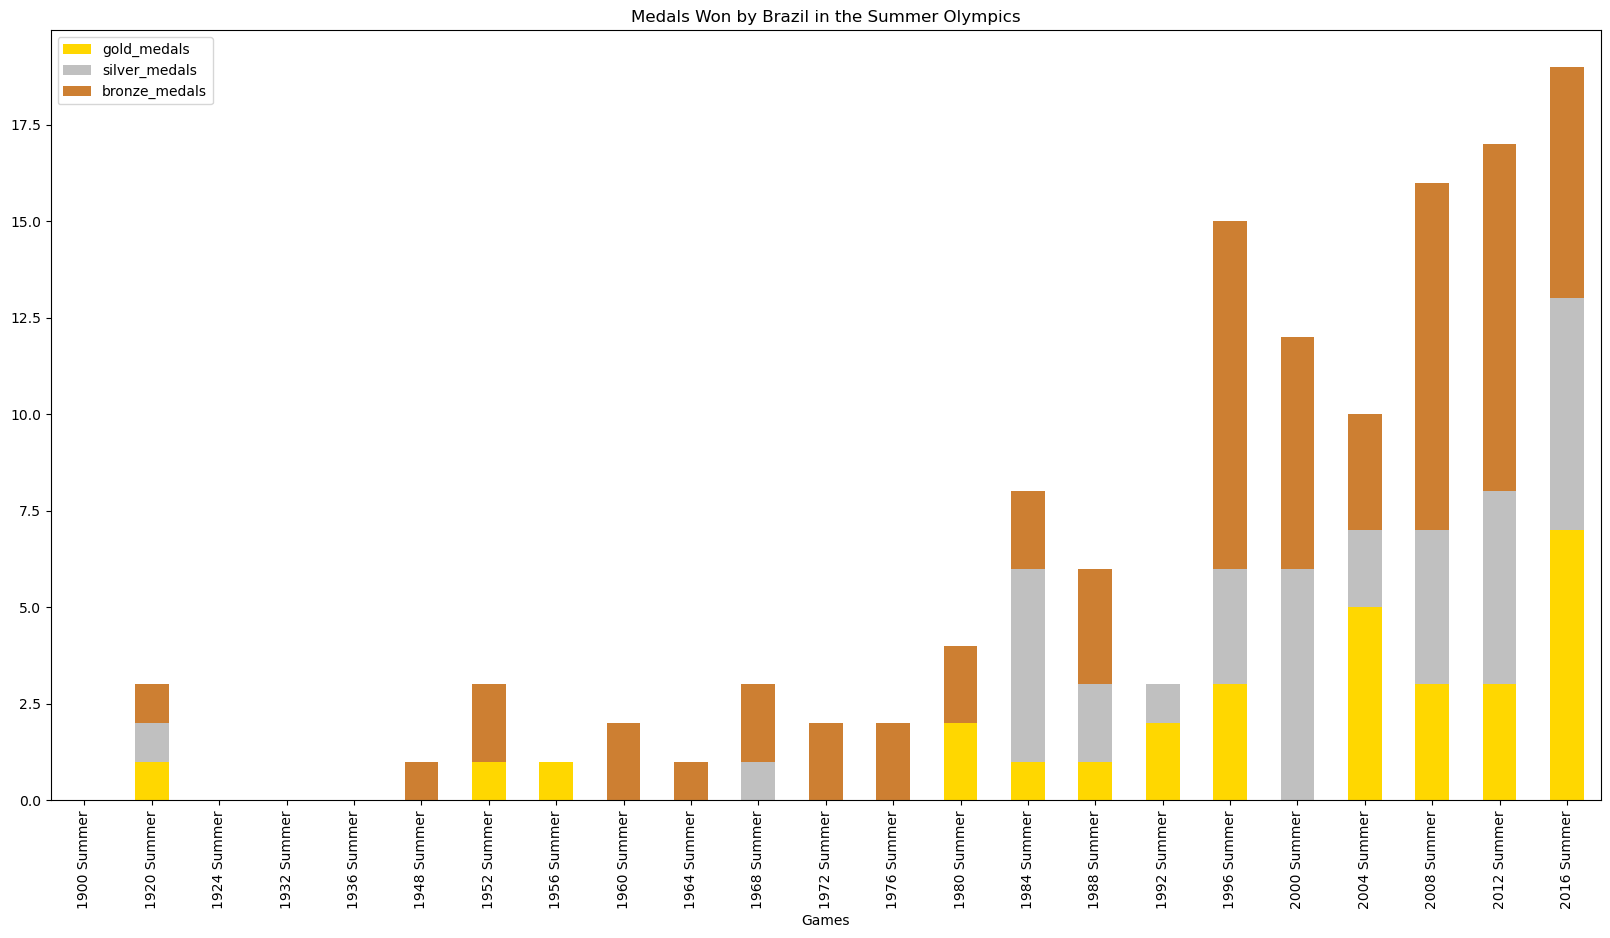

In [27]:
# Plot the gold_medals, silver_medals, bronze_medals and non_medal_participations for the Brazil team in the Summer Olympics.
# Use a stacked bar chart, where the total size of the bar is the total_participations

import matplotlib.pyplot as plt
games_df_brazil[['gold_medals', 'silver_medals', 'bronze_medals']].plot(
                                    kind='bar',
                                    stacked=True,
                                    figsize=(20, 10),
                                    color=['#ffd700', '#c0c0c0', '#cd7f32'],
                                    title='Medals Won by Brazil in the Summer Olympics',)
# use #ffd700 for gold, #c0c0c0 for silver and #cd7f32 for bronze

<Axes: title={'center': 'Medal Rate for Brazil in the Summer Olympics'}, xlabel='Games'>

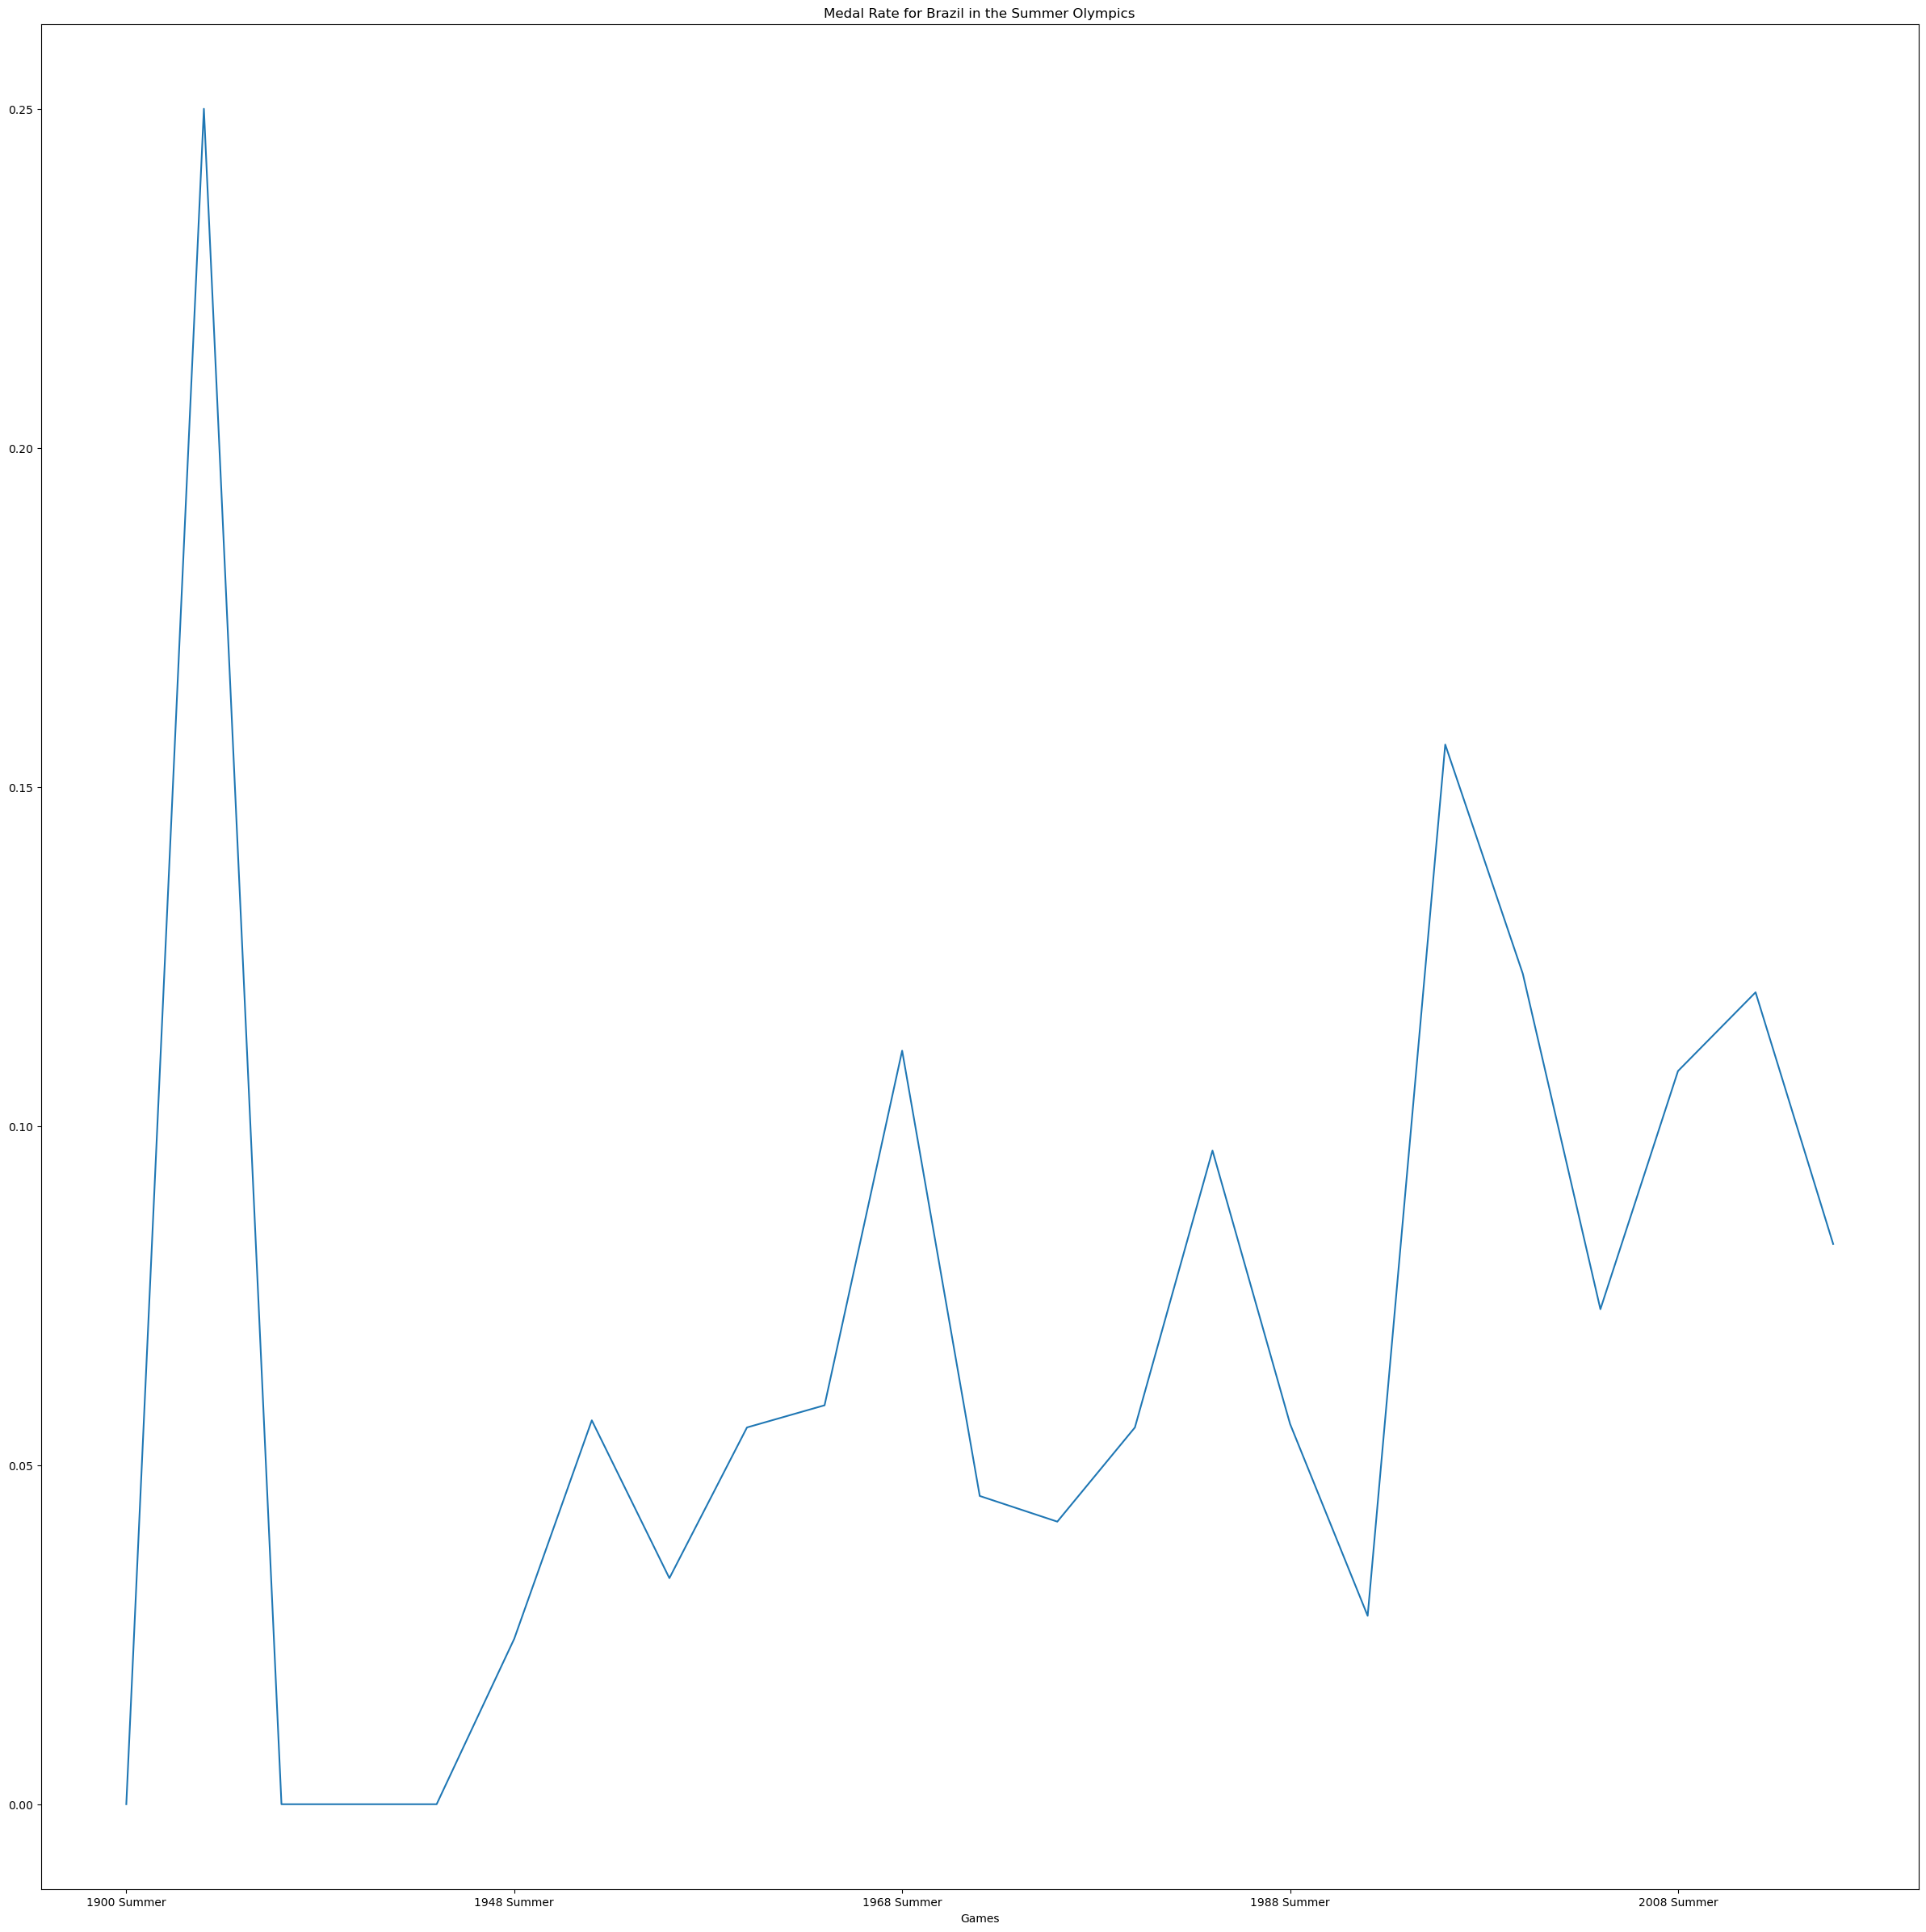

In [30]:
# Use a line chart to plot the medal_rate for the Brazil team in the Summer Olympics.
games_df_brazil['medal_rate'].plot(kind='line', figsize=(20, 10), title='Medal Rate for Brazil in the Summer Olympics')

<Axes: xlabel='Games'>

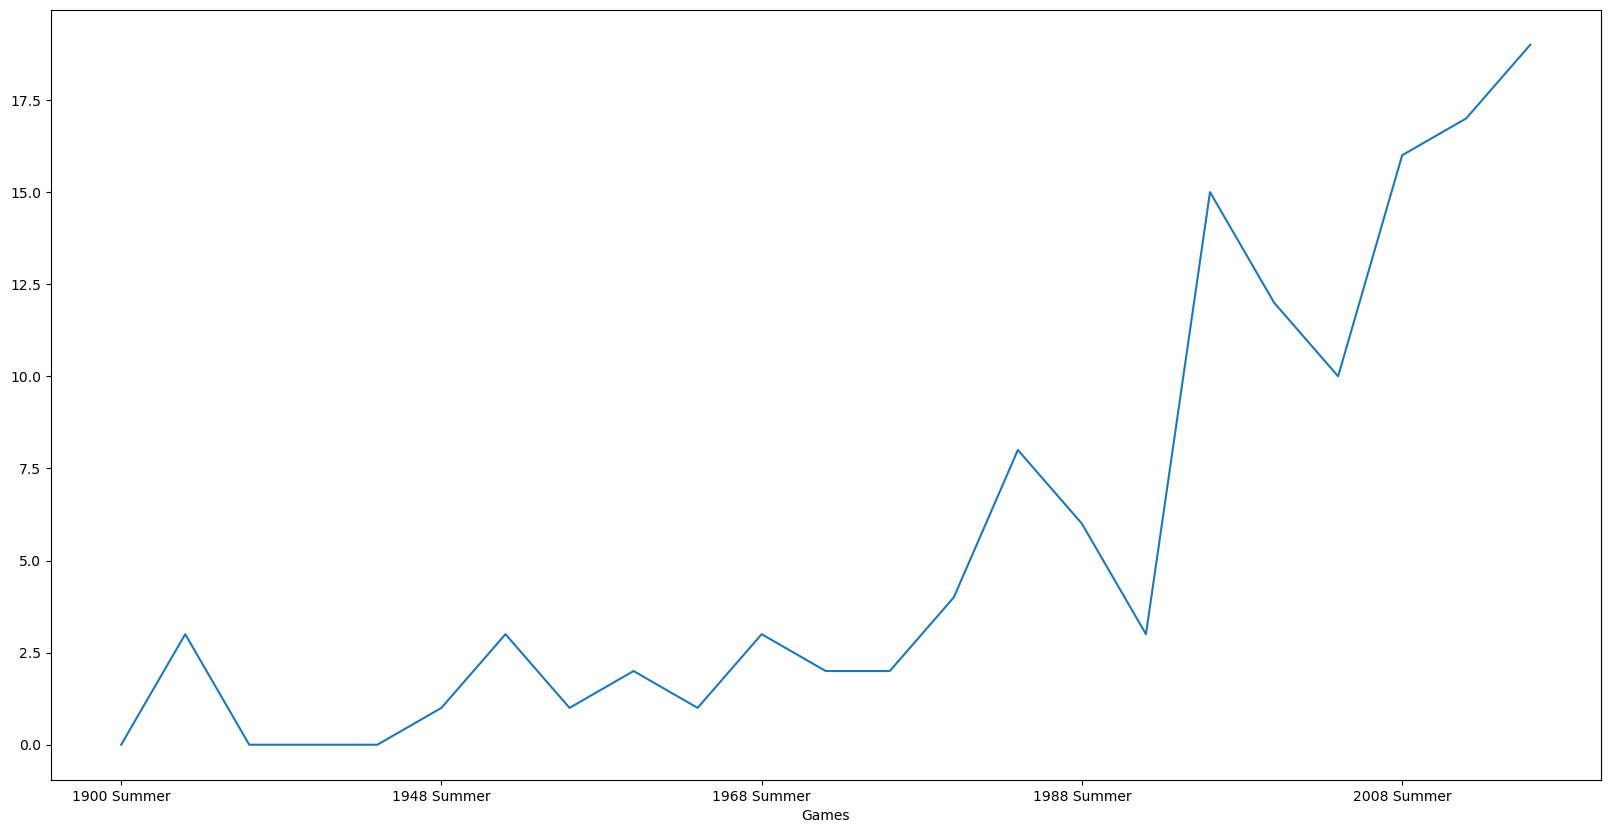

In [31]:
# Use a line chart to plot the medal count for the Brazil team in the Summer Olympics.
games_df_brazil['total_medals'].plot(kind='line', figsize=(20, 10))

In [32]:
# Calculate the average medal count for the Brazil team for the Summer Olympics
average_medal_count_brazil = games_df_brazil['total_medals'].mean()
print(average_medal_count_brazil)

# Calculate the average medal count for the Brazil team in the games where they won at least one medal
average_medal_count_brazil_won = games_df_brazil[games_df_brazil['total_medals'] > 0]['total_medals'].mean()
print(average_medal_count_brazil_won)

5.565217391304348
6.7368421052631575


In [33]:
# Show the medal count for the 2016 Summer Games
games_df_brazil.loc['2016 Summer']

Medal                        19.000000
gold_medals                   7.000000
silver_medals                 6.000000
bronze_medals                 6.000000
total_medals                 19.000000
non_medal_participations    211.000000
total_participations        230.000000
medal_rate                    0.082609
gold_percentage               0.368421
silver_percentage             0.315789
bronze_percentage             0.315789
non_medal_percentage          0.917391
Name: 2016 Summer, dtype: float64

In [34]:
from scipy.stats import zscore

# add z_scores column to the games_df_brazil dataframe
games_df_brazil['z_scores'] = zscore(games_df_brazil['total_medals'])
games_df_brazil

,Medal,gold_medals,silver_medals,bronze_medals,total_medals,non_medal_participations,total_participations,medal_rate,gold_percentage,silver_percentage,bronze_percentage,non_medal_percentage,z_scores
Games,,,,,,,,,,,,,
1900 Summer,0,0,0,0,0,3,3,0.000000,NaN,NaN,NaN,1.000000,-0.926612
1920 Summer,3,1,1,1,3,9,12,0.250000,0.333333,0.333333,0.333333,0.750000,-0.427110
1924 Summer,0,0,0,0,0,15,15,0.000000,NaN,NaN,NaN,1.000000,-0.926612
1932 Summer,0,0,0,0,0,28,28,0.000000,NaN,NaN,NaN,1.000000,-0.926612
1936 Summer,0,0,0,0,0,37,37,0.000000,NaN,NaN,NaN,1.000000,-0.926612
1948 Summer,1,0,0,1,1,40,41,0.024390,0.000000,0.000000,1.000000,0.975610,-0.760112
1952 Summer,3,1,0,2,3,50,53,0.056604,0.333333,0.000000,0.666667,0.943396,-0.427110
1956 Summer,1,1,0,0,1,29,30,0.033333,1.000000,0.000000,0.000000,0.966667,-0.760112
1960 Summer,2,0,0,2,2,34,36,0.055556,0.000000,0.000000,1.000000,0.944444,-0.593611


In [36]:
The above distribution shows us visually that the Brazilian team's medal haul in the 2016 games is much higher than the mean, and that they 
had their early efforts of 0 medals won skewed the data a bit.

SyntaxError: unterminated string literal (detected at line 1) (2985098734.py, line 1)

In [37]:
# Calculate the mean total_medals for the Brazil team in all games except for Rio de Janeiro in 2016
mean_total_medals_brazil = games_df_brazil['total_medals'].mean()
print(mean_total_medals_brazil)

5.565217391304348


In [41]:
# Using our games_df_rw dataframe, let's get the 2016 Summer Games data
summer_2016_rw = games_df_rw[games_df_rw['Games'] == '2016 Summer']

# let's order this data by descending medal count
summer_2016_rw = summer_2016_rw.sort_values(by='Medal', ascending=False)

# let's only use the Games, NOC, and Medal columns
summer_2016_rw_short = summer_2016_rw[['Games', 'NOC', 'Medal']]
print('Rio de Janiero 2016 Medal Count for the Rest of the World:')
summer_2016_rw_short.head(15)

Rio de Janiero 2016 Medal Count for the Rest of the World:


,Games,NOC,Medal
2778,2016 Summer,USA,121
2618,2016 Summer,CHN,70
2648,2016 Summer,GBR,67
2739,2016 Summer,RUS,56
2644,2016 Summer,FRA,42
2652,2016 Summer,GER,42
2677,2016 Summer,JPN,41
2591,2016 Summer,AUS,29
2673,2016 Summer,ITA,28
2613,2016 Summer,CAN,22


In [42]:
With 19 medals, Brazil would have been tied with the Netherlands in the medal rankings at number 12.

SyntaxError: invalid syntax (3113478138.py, line 1)

In [43]:
# Let's calculate the average medal count for the rest of the world in the 2016 Summer Olympics
average_medal_count_rw_2016 = summer_2016_rw['Medal'].mean()
average_medal_count_rw_2016

4.631067961165049

In [ ]:
Summary for Team Brazil

Metric	                2016 Rio de Janeiro (Brazil Team)	Other Games (Brazil Team)
Medal Count	            19	                                5.56 (mean)
z-score	                2.236900	                       
Medal Ranking for Games	12 (Tied with the Netherlands)

Brazil's Performance in the 2016 Summer Olympics:
Historical Comparison: Brazil's performance in the 2016 Olympics was its best ever in terms of total medal count, with 19 medals. This marked a 
significant improvement compared to previous Olympics, where Brazil typically won fewer medals.

Gold Medal Success: Brazil won seven gold medals in 2016, exceeding its previous record of five golds. 

Host Nation Advantage: Hosting the Olympics provided Brazil with a boost in morale and support, contributing to its strong performance across 
various sports.

Prospects in Future Olympics:
Continued Growth: Brazil has been investing in sports infrastructure and athlete development programs, which could lead to continued growth in its 
Olympic performances.

Global Competition: Brazil will face stiff competition from traditional powerhouse nations like the United States, China, and Russia, 
as well as emerging contenders from countries like Great Britain, Australia, and Japan. Maintaining and improving its performance will require sustained 
efforts and investments.

Legacy of 2016 Olympics: The infrastructure and facilities built for the 2016 Olympics could provide a foundation for future success. Continued use of 
these facilities for training and competitions could benefit Brazilian athletes in the long term.

Youth Development: Investing in youth sports programs and talent identification initiatives could ensure a pipeline of talented athletes for future 
Olympic Games.

In summary, Brazil's performance in the 2016 Summer Olympics was a significant milestone, but the country has the potential for further growth and 
success in future Olympics. Continued investment in sports infrastructure, athlete development, and diversification of sports could enhance Brazil's 
competitiveness on the global stage.